In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from datetime import datetime, time 

import pickle

## Importing hand-made modules - Change scraper_modules_path to folder containing custom modules
import sys
scraper_modules_path = 'C:/Users/ABour/Desktop/Energy Systems & Data Analytics/Modules/Energy Analysis - Aidan/Smart Meters/custom_modules'
if scraper_modules_path not in sys.path:
    sys.path.append(scraper_modules_path)

import pre_processing as pp

<br>

### Reading In & Cleaning Data

In [4]:
df_smart_meters_wide = pd.read_csv('data/consumption_d.csv', parse_dates=['GMT'])
df_smart_meters_wide

,GMT,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
0,2011-11-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-11-23 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-11-23 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-11-23 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-11-23 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-11-23 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-11-23 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-11-23 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-11-23 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_smart_meters_long = (pd.wide_to_long(df_smart_meters_wide, stubnames='D', i='GMT', j='id')
                        .reset_index()
                        .rename(columns={'D':'kWh', 'GMT':'datetime'})
                        .dropna()
                            )

df_smart_meters_long.head(10)

,datetime,id,kWh
8644,2012-05-21 11:00:00,0,0.081
8645,2012-05-21 11:30:00,0,0.035
8646,2012-05-21 12:00:00,0,0.037
8647,2012-05-21 12:30:00,0,0.072
8648,2012-05-21 13:00:00,0,0.329
8649,2012-05-21 13:30:00,0,0.127
8650,2012-05-21 14:00:00,0,0.203
8651,2012-05-21 14:30:00,0,0.037
8652,2012-05-21 15:00:00,0,0.068
8653,2012-05-21 15:30:00,0,0.037


In [6]:
df_smart_meters = df_smart_meters_long.copy()

## Separating out subset of data for analysis
test_ids = df_smart_meters.id.unique()[:10]
df_test = df_smart_meters.copy()[df_smart_meters.id.isin(test_ids)]

## Creating SP Column
dt_values = df_test['datetime']
df_test['SP'] = dt_values.apply(pp.time_2_SP)

## Separating out ToU and std tariff periods
std_bool = df_test.datetime.dt.year!=2013
df_test_std = df_test.copy()[std_bool]
df_test_ToU = df_test.copy()[~std_bool]

df_test_ToU.head(10)

,datetime,id,kWh,SP
19422,2013-01-01 00:00:00,0,1.043,1
19423,2013-01-01 00:30:00,0,0.404,2
19424,2013-01-01 01:00:00,0,0.185,3
19425,2013-01-01 01:30:00,0,0.151,4
19426,2013-01-01 02:00:00,0,0.139,5
19427,2013-01-01 02:30:00,0,0.105,6
19428,2013-01-01 03:00:00,0,0.122,7
19429,2013-01-01 03:30:00,0,0.091,8
19430,2013-01-01 04:00:00,0,0.110,9
19431,2013-01-01 04:30:00,0,0.100,10


In [7]:
## Reading in ToU price data
df_ToU_price_raw = (pd.read_csv('data/tariff_d.csv', parse_dates=['GMT'])
                    .rename({'GMT':'datetime', 'Price':'price', 'Event_tags':'event'}, axis=1))
df_ToU_price_raw.head(10)

,datetime,price,event
0,2013-01-01 00:30:00,0.1176,NaN
1,2013-01-01 01:00:00,0.1176,NaN
2,2013-01-01 01:30:00,0.1176,NaN
3,2013-01-01 02:00:00,0.1176,NaN
4,2013-01-01 02:30:00,0.1176,NaN
5,2013-01-01 03:00:00,0.1176,NaN
6,2013-01-01 03:30:00,0.1176,NaN
7,2013-01-01 04:00:00,0.1176,NaN
8,2013-01-01 04:30:00,0.1176,NaN
9,2013-01-01 05:00:00,0.1176,NaN


In [8]:
def clean_and_extract_price(df_ToU_price):
    df_ToU_price = (df_ToU_price[df_ToU_price.datetime.dt.year==2013] # Dropping spare day at start of 2014
                    .drop(columns=['event']) # Drop unnecessary columns
                    .set_index('datetime')) # Set datetime as index
    return df_ToU_price

df_price = clean_and_extract_price(df_ToU_price_raw.copy())
df_price.head(10)

,price
datetime,
2013-01-01 00:30:00,0.1176
2013-01-01 01:00:00,0.1176
2013-01-01 01:30:00,0.1176
2013-01-01 02:00:00,0.1176
2013-01-01 02:30:00,0.1176
2013-01-01 03:00:00,0.1176
2013-01-01 03:30:00,0.1176
2013-01-01 04:00:00,0.1176
2013-01-01 04:30:00,0.1176


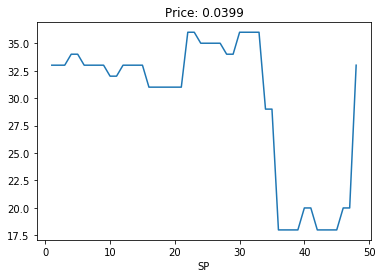

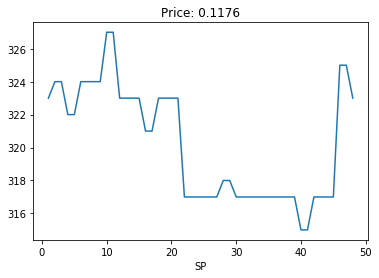

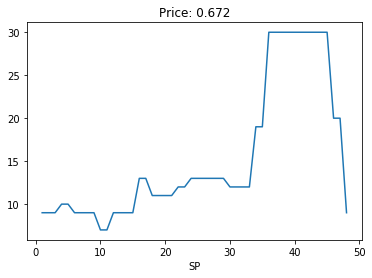

In [9]:
## Grouping ToU TS Prices by SP and Price
df_ToU_price = df_ToU_price_raw.copy()
dt_values = df_ToU_price['datetime']
df_ToU_price['SP'] = dt_values.apply(pp.time_2_SP)

df_ToU_price_groupby = df_ToU_price.groupby(['price', 'SP']).price.count().unstack().T

## Plotting ToU Prices Distributions with SP
prices = [0.0399, 0.1176, 0.672]

for price in prices:
    plt.figure()
    df_ToU_price_groupby[price].plot()
    plt.title(f'Price: {price}')

<br>

### Demand Side Response Quantification - Test Subset

In [10]:
_id = test_ids[0]

def create_df_household(df_ToU, df_price, _id):
    df_household = (
                    df_ToU.copy() # Set as copy of df_ToU
                    [df_ToU.id==_id] # Filter for household id
                    .drop(columns='id') # Drop id column
                    .set_index('datetime') # Set index as datetime column
                    .assign(price=df_price.price) # Set price according to price df
                    .dropna() # Drop NA values
                    .astype('float') # Setting data types to float
    ) 
    return df_household

df_household = create_df_household(df_test_ToU, df_price, _id)
df_household.head(10)

,kWh,SP,price
datetime,,,
2013-01-01 00:30:00,0.404,2.0,0.1176
2013-01-01 01:00:00,0.185,3.0,0.1176
2013-01-01 01:30:00,0.151,4.0,0.1176
2013-01-01 02:00:00,0.139,5.0,0.1176
2013-01-01 02:30:00,0.105,6.0,0.1176
2013-01-01 03:00:00,0.122,7.0,0.1176
2013-01-01 03:30:00,0.091,8.0,0.1176
2013-01-01 04:00:00,0.110,9.0,0.1176
2013-01-01 04:30:00,0.100,10.0,0.1176


In [11]:
SPs = list(df_household.SP.unique())
SPs.sort()

plot_SP_price_dist = False
if plot_SP_price_dist==True:
    for SP in SPs:
        df_household_filtered_SP = df_household[df_household.SP==SP] # Filter on SP
        df_household_filtered_SP = df_household_filtered_SP[(df_household_filtered_SP.index.dayofweek>4)] # Dropping weekend

        plt.figure()
        for price in prices:
            df_household_filtered_SP_price = df_household_filtered_SP[df_household_filtered_SP.price==price].drop(columns=['price']) # Filter on price

            sns.distplot(df_household_filtered_SP_price.kWh, label=f'{price}')

        plt.title(f'SP: {int(SP)}')
        plt.legend(title='Price')
        plt.ylim(0, 20)
        plt.xlim(0, 0.5)

In [12]:
household_dict = dict()

def add_df_household_DSR_2_dict(df_household_filtered, household_dict):
    household_dict['SPs'] = dict()
    
    for SP in SPs:
        # Filter on SP
        df_household_filtered_SP = df_household_filtered[df_household_filtered.SP==SP]
        household_dict['SPs'][SP] = dict()

        for price in prices:
            # Filter on price
            df_household_filtered_SP_price = df_household_filtered_SP[df_household_filtered_SP.price==price].drop(columns=['price'])

            mean_price = df_household_filtered_SP_price.kWh.mean()
            household_dict['SPs'][SP][price] = mean_price

    return household_dict
        
df_household_filtered = df_household.copy()#[(df_household.index.dayofweek>4)] # Dropping weekend
household_dict = add_df_household_DSR_2_dict(df_household_filtered, household_dict)

<Figure size 432x288 with 0 Axes>

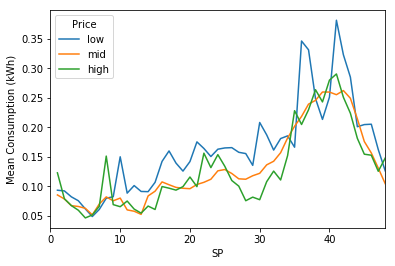

In [13]:
def plot_household_DSR(household_dict):
    plt.figure()
    pd.DataFrame(household_dict['SPs']).T.plot()
    plt.legend(title='Price', labels=['low', 'mid', 'high'])
    plt.xlabel('SP')
    plt.ylabel('Mean Consumption (kWh)')
    plt.xlim(1, 48)
    plt.xlim(0)
    
plot_household_DSR(household_dict)

<Figure size 432x288 with 0 Axes>

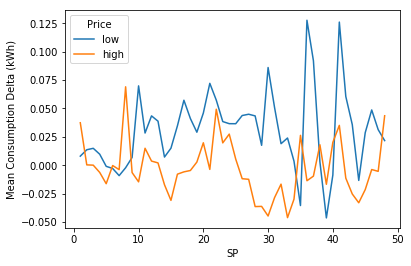

In [14]:
def plot_household_DSR_delta(household_dict):
    df_household_DSR = pd.DataFrame(household_dict['SPs']).T
    df_household_DSR_delta = df_household_DSR.copy()
    df_household_DSR_delta[prices[0]] -= df_household_DSR_delta[prices[1]]
    df_household_DSR_delta[prices[2]] -= df_household_DSR_delta[prices[1]]
    df_household_DSR_delta = df_household_DSR_delta.drop(columns=prices[1])
    
    plt.figure()
    df_household_DSR_delta.plot()
    plt.legend(title='Price', labels=['low', 'high'])
    plt.xlabel('SP')
    plt.ylabel('Mean Consumption Delta (kWh)')
    
plot_household_DSR_delta(household_dict)

In [15]:
def add_s_household_DSR_2_dict(household_dict):
    s_household_DSR = pd.DataFrame(household_dict['SPs']).T.mean()
    household_dict['s_DSR'] = s_household_DSR
    return household_dict

household_dict = add_s_household_DSR_2_dict(household_dict)
household_dict['s_DSR']

0.0399    0.162828
0.1176    0.131705
0.6720    0.129085
dtype: float64

In [17]:
def add_deltas_2_household_dict(household_dict):
    s_DSR = household_dict['s_DSR']
    mid_consumption = s_DSR.loc[prices[1]]
    household_dict['low_delta'] = s_DSR.loc[prices[0]] - mid_consumption
    household_dict['high_delta'] = s_DSR.loc[prices[2]] - mid_consumption
    return household_dict

household_dict = add_deltas_2_household_dict(household_dict)
print(f'Low Delta: {household_dict["low_delta"]}')
print(f'High Delta: {household_dict["high_delta"]}')

Low Delta: 0.031123549345276946
High Delta: -0.002619221117596021


In [20]:
type(_id)

numpy.int64

In [21]:
def create_household_dict(df_test_ToU, df_price, _id):
    df_household = create_df_household(df_test_ToU, df_price, _id)

    household_dict = dict()
    household_dict = add_df_household_DSR_2_dict(df_household, household_dict)
    household_dict = add_s_household_DSR_2_dict(household_dict)
    household_dict = add_deltas_2_household_dict(household_dict)

    return household_dict

households_dict = dict()
for _id in test_ids:
    households_dict[_id] = create_household_dict(df_test_ToU, df_price, _id)

<Figure size 432x288 with 0 Axes>

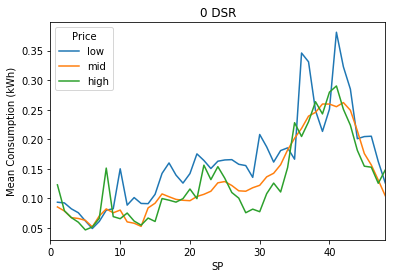

<Figure size 432x288 with 0 Axes>

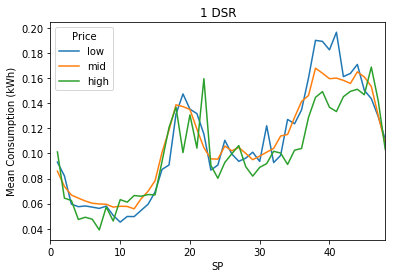

<Figure size 432x288 with 0 Axes>

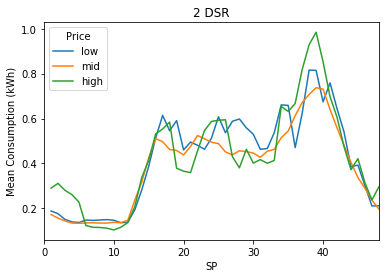

<Figure size 432x288 with 0 Axes>

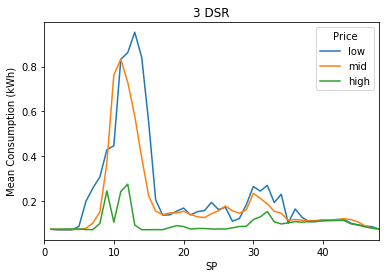

<Figure size 432x288 with 0 Axes>

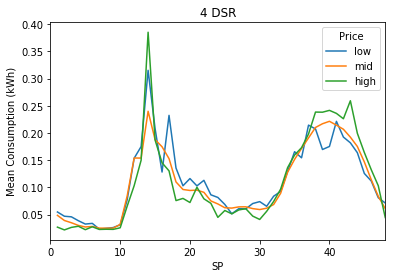

<Figure size 432x288 with 0 Axes>

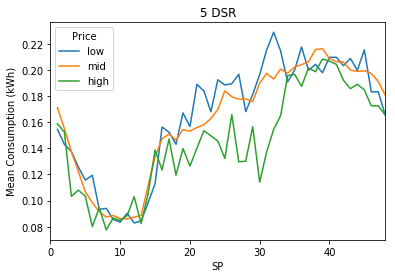

<Figure size 432x288 with 0 Axes>

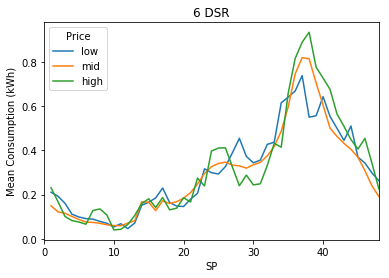

<Figure size 432x288 with 0 Axes>

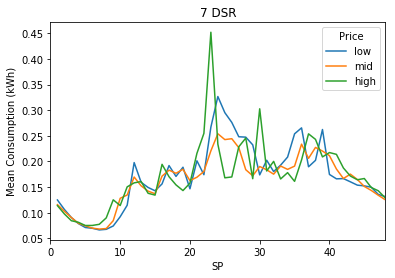

<Figure size 432x288 with 0 Axes>

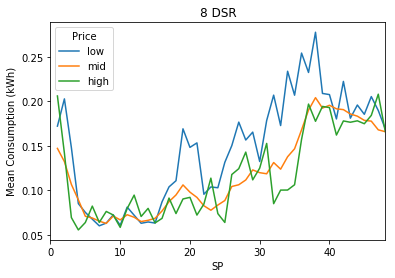

<Figure size 432x288 with 0 Axes>

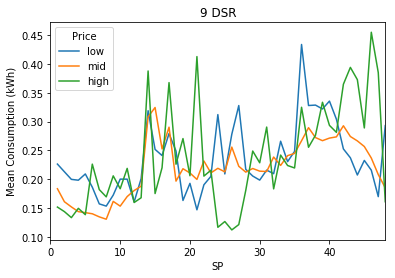

In [23]:
plot_DSR = True
if plot_DSR == True:
    for _id in test_ids:
        household_dict = households_dict[_id]
        plot_household_DSR(household_dict)
        plt.title(f'{_id} DSR')

<Figure size 432x288 with 0 Axes>

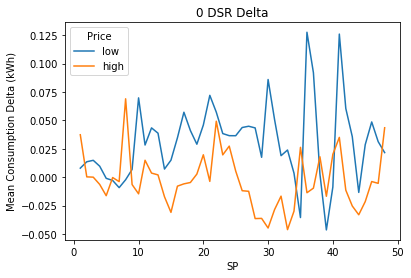

<Figure size 432x288 with 0 Axes>

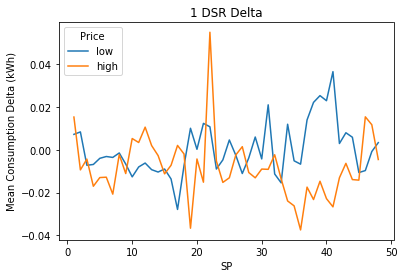

<Figure size 432x288 with 0 Axes>

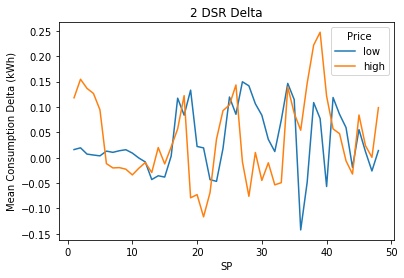

<Figure size 432x288 with 0 Axes>

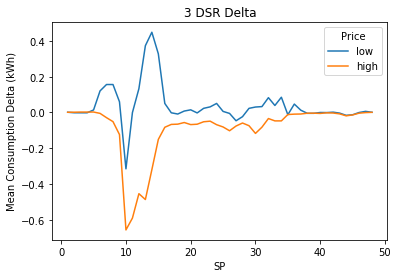

<Figure size 432x288 with 0 Axes>

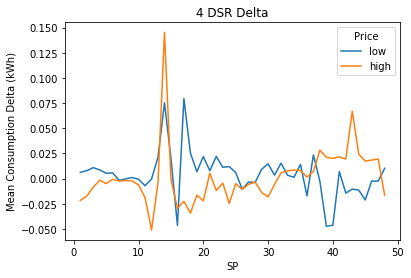

<Figure size 432x288 with 0 Axes>

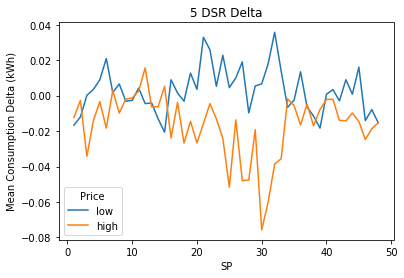

<Figure size 432x288 with 0 Axes>

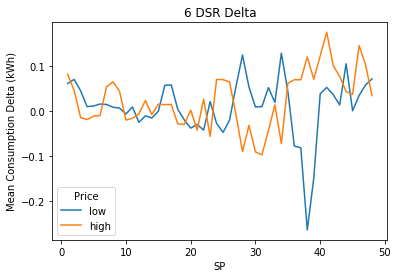

<Figure size 432x288 with 0 Axes>

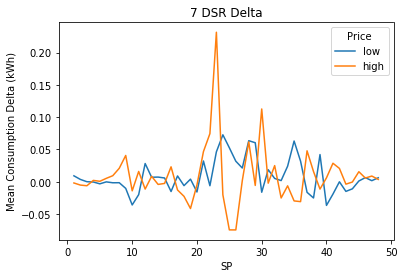

<Figure size 432x288 with 0 Axes>

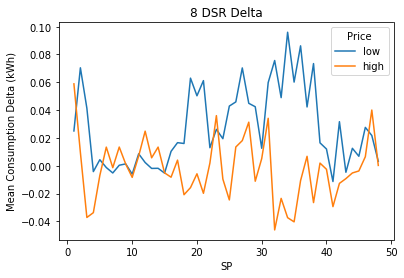

<Figure size 432x288 with 0 Axes>

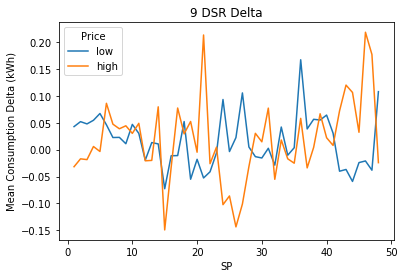

In [24]:
plot_DSR_delta = True
if plot_DSR_delta == True:
    for _id in test_ids:
        household_dict = households_dict[_id]
        plot_household_DSR_delta(household_dict)
        plt.title(f'{_id} DSR Delta')

<br>

### Demand Side Response Quantification - Full Dataset

In [25]:
## Separating out subset of data for analysis
df_smart_meters = df_smart_meters.copy()

## Creating SP Column
dt_values = df_smart_meters['datetime']
df_smart_meters['SP'] = dt_values.apply(pp.time_2_SP)

## Separating out ToU and std tariff periods
std_bool = df_smart_meters.datetime.dt.year!=2013
df_std = df_smart_meters.copy()[std_bool]
df_ToU = df_smart_meters.copy()[~std_bool]

df_ToU.head(10)

,datetime,id,kWh,SP
19422,2013-01-01 00:00:00,0,1.043,1
19423,2013-01-01 00:30:00,0,0.404,2
19424,2013-01-01 01:00:00,0,0.185,3
19425,2013-01-01 01:30:00,0,0.151,4
19426,2013-01-01 02:00:00,0,0.139,5
19427,2013-01-01 02:30:00,0,0.105,6
19428,2013-01-01 03:00:00,0,0.122,7
19429,2013-01-01 03:30:00,0,0.091,8
19430,2013-01-01 04:00:00,0,0.110,9
19431,2013-01-01 04:30:00,0,0.100,10


In [31]:
households_dict = dict()
ids = df_smart_meters.id.unique()

for _id in ids:
    households_dict[_id] = create_household_dict(df_ToU, df_price, _id)
    
save_dict = True
if save_dict== True:
    with open('data/household_ToU_response_d_format.pickle', 'wb') as handle:
        pickle.dump(households_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
low_deltas = []
high_deltas = []

for _id in ids:
    household_dict = households_dict[_id]
    low_deltas.append(household_dict['low_delta'])
    high_deltas.append(household_dict['high_delta'])

In [33]:
df_deltas = pd.DataFrame(data={'low_delta':low_deltas, 'high_delta':high_deltas}, index=ids).dropna()
df_deltas.index.name = 'id'
df_deltas.head(10)

,low_delta,high_delta
id,,
0,0.031124,-0.002619
1,0.000048,-0.008023
2,0.033354,0.036858
3,0.038860,-0.088513
4,0.004333,0.001244
5,0.002944,-0.016599
6,0.009365,0.023855
7,0.008307,0.008724
8,0.027515,-0.002300


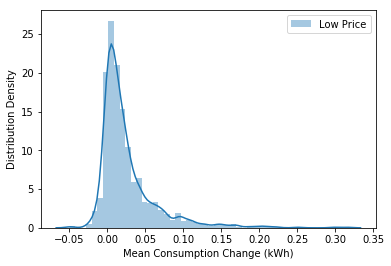

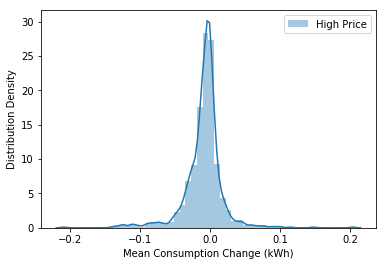

In [34]:
plt.figure()
sns.distplot(df_deltas.low_delta, label='Low Price')
plt.xlabel('Mean Consumption Change (kWh)')
plt.ylabel('Distribution Density')
plt.legend()

plt.figure()
sns.distplot(df_deltas.high_delta, label='High Price')
plt.xlabel('Mean Consumption Change (kWh)')
plt.ylabel('Distribution Density')
plt.legend()

<br>

### Demand Side Response Analysis

In [41]:
# Use magnitude of combined DSR response to rank households on their behaviour change
## Compare against combining ranks from individual DSRs of high and low

df_deltas['combined_DRS'] = df_deltas.low_delta - df_deltas.high_delta
df_deltas['DRS_rank'] = df_deltas.combined_DRS.rank().astype('int')

df_deltas = df_deltas.sort_values(by='DRS_rank', ascending=False)
df_deltas.to_csv('data/DSR_deltas.csv')

df_deltas.head(10)

,low_delta,high_delta,combined_DRS,DRS_rank
id,,,,
140,0.298468,-0.124587,0.423056,1025
969,0.217026,-0.131711,0.348738,1024
323,0.200940,-0.128602,0.329541,1023
144,0.250917,-0.077235,0.328152,1022
367,0.187738,-0.135560,0.323298,1021
649,0.223205,-0.093347,0.316552,1020
656,0.207729,-0.079527,0.287256,1019
186,0.076935,-0.208825,0.285761,1018
456,0.159227,-0.113751,0.272978,1017


(-0.15, 0.05)

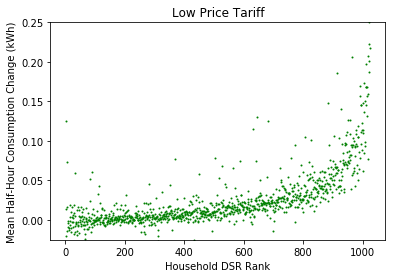

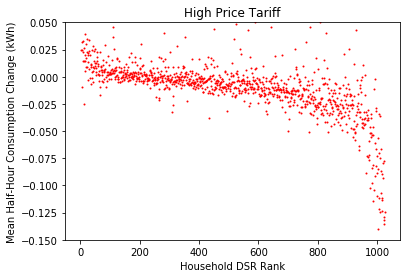

In [36]:
plt.figure()
plt.scatter(df_deltas.DRS_rank , df_deltas.low_delta, s=1, c='g')
plt.xlabel('Household DSR Rank')
plt.ylabel('Mean Half-Hour Consumption Change (kWh)')
plt.title('Low Price Tariff')
plt.ylim(-0.025, 0.25)

plt.figure()
plt.scatter(df_deltas.DRS_rank , df_deltas.high_delta, s=1, c='r')
plt.xlabel('Household DSR Rank')
plt.ylabel('Mean Half-Hour Consumption Change (kWh)')
plt.title('High Price Tariff')
plt.ylim(-0.15, 0.05)

<Figure size 432x288 with 0 Axes>

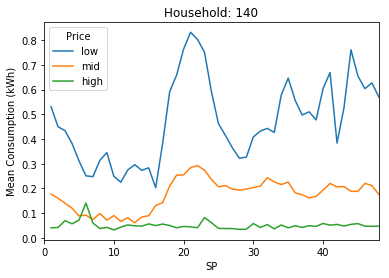

<Figure size 432x288 with 0 Axes>

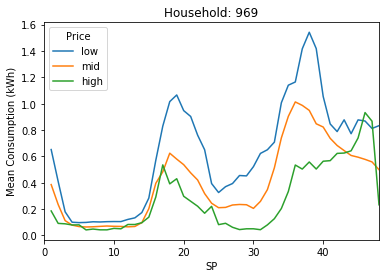

<Figure size 432x288 with 0 Axes>

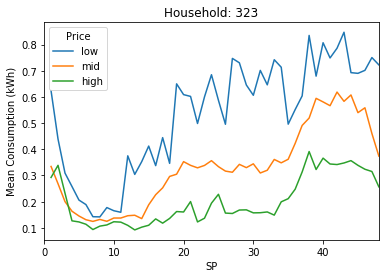

<Figure size 432x288 with 0 Axes>

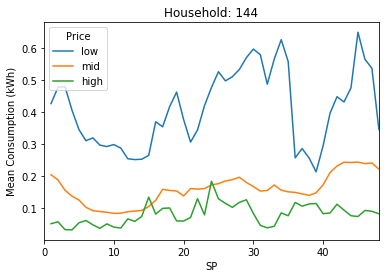

<Figure size 432x288 with 0 Axes>

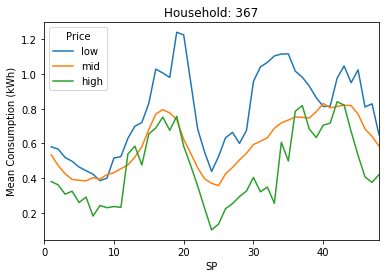

In [37]:
for _id in df_deltas.iloc[:5].index:
    household_dict = households_dict[_id]
    plot_household_DSR(household_dict)
    plt.title(f'Household: {_id}')

<Figure size 432x288 with 0 Axes>

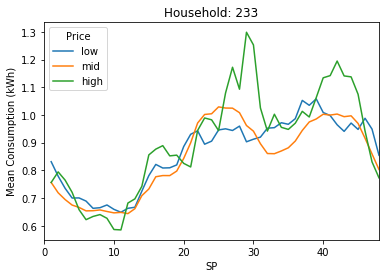

<Figure size 432x288 with 0 Axes>

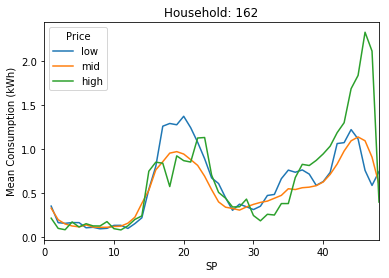

<Figure size 432x288 with 0 Axes>

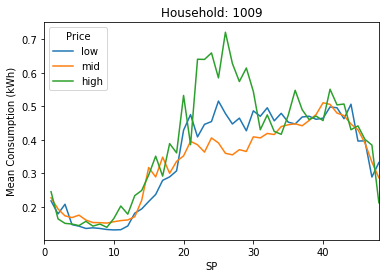

<Figure size 432x288 with 0 Axes>

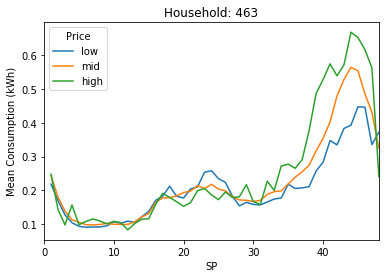

<Figure size 432x288 with 0 Axes>

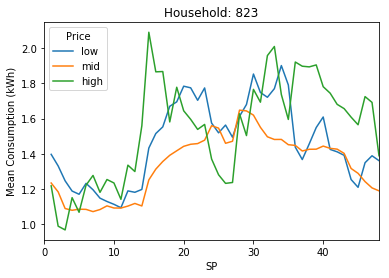

In [38]:
for _id in df_deltas.iloc[-5:].index:
    household_dict = households_dict[_id]
    plot_household_DSR(household_dict)
    plt.title(f'Household: {_id}')